<a href="https://colab.research.google.com/github/Gabrielamb2/MachineLearning/blob/main/Projeto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from matplotlib.colors import ListedColormap
import geopandas as gpd 
import folium
from folium.plugins import MarkerCluster,HeatMap,HeatMapWithTime
import branca.colormap as colormap
from collections import defaultdict

RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)

In [4]:
microplastics_path = "../Level012R1.csv"

In [47]:
df_microplastic = pd.read_csv(microplastics_path)

In [48]:
df_microplastic.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
year,8218.0,2008.600024,5.128177e+00,2000.0000,2004.0000,2009.00000,2013.000000,2.019000e+03
month,8218.0,6.851910,3.290428e+00,1.0000,4.0000,7.00000,10.000000,1.200000e+01
date,8218.0,15.396690,8.688046e+00,1.0000,8.0000,15.00000,22.000000,3.100000e+01
"longitude (degree: E+, W-)",8218.0,-57.421250,9.045766e+01,-179.9942,-129.3175,-71.93500,-9.048275,1.791400e+02
"latitude (degree: N+, S-)",8218.0,24.752908,2.357552e+01,-64.8800,14.7525,28.90850,40.408425,8.976140e+01
Level 0 (pieces/m3),8218.0,-80.242298,2.757827e+02,-999.0000,0.0000,0.00432,0.103750,4.910000e+02
ratio (fragment<5 mm),8218.0,0.794180,2.685978e-01,0.0000,0.8300,0.83000,1.000000,1.000000e+00
Level 1 (pieces/m3),8218.0,-81.881081,2.748722e+02,-999.0000,0.0000,0.00299,0.065850,4.910000e+02
windspeed (m/s),8218.0,5.923617,3.034230e+00,0.0000,4.0225,6.07500,8.080000,1.720000e+01
significant wave height (m),8218.0,1.675609,1.009535e+00,0.0000,1.0200,1.75000,2.360000,7.730000e+00


In [49]:
df_microplastic.head(5).transpose()

,0,1,2,3,4
year,NaN,2001,2001,2001,2001
month,NaN,10,10,10,10
date,NaN,12,12,12,14
"longitude (degree: E+, W-)",NaN,-117.18,-117.18,-117.47,-117.18
"latitude (degree: N+, S-)",NaN,32.42,31.54,30.6,29.1
Level 0 (pieces/m3),NaN,0.00864,0.0119,0,0
ratio (fragment<5 mm),NaN,0.83,0.83,0.83,0.83
Level 1 (pieces/m3),NaN,0.00717,0.00988,0,0
windspeed (m/s),NaN,3.78,3.49,4.8,3.55
significant wave height (m),NaN,1.94,2.06,2.2,2.24


In [50]:
df_microplastic.columns

Index(['year', 'month', 'date', 'longitude (degree: E+, W-)',
       'latitude (degree: N+, S-)', 'Level 0 (pieces/m3)',
       'ratio (fragment<5 mm)', 'Level 1 (pieces/m3)', 'windspeed (m/s)',
       'significant wave height (m)', 'Level 2p (pieces/km2)',
       'Level 2w1 (g/km2)', 'Level 2w2 (g/km2)', 'No. in Table 1'],
      dtype='object')

In [55]:
num_microplatic = df_microplatic.columns.drop(['year', 'month', 'date','Level 2w1 (g/km2)'])
num_microplatic

Index(['longitude (degree: E+, W-)', 'latitude (degree: N+, S-)',
       'Level 0 (pieces/m3)', 'ratio (fragment<5 mm)', 'Level 1 (pieces/m3)',
       'windspeed (m/s)', 'significant wave height (m)',
       'Level 2p (pieces/km2)', 'Level 2w2 (g/km2)', 'No. in Table 1'],
      dtype='object')

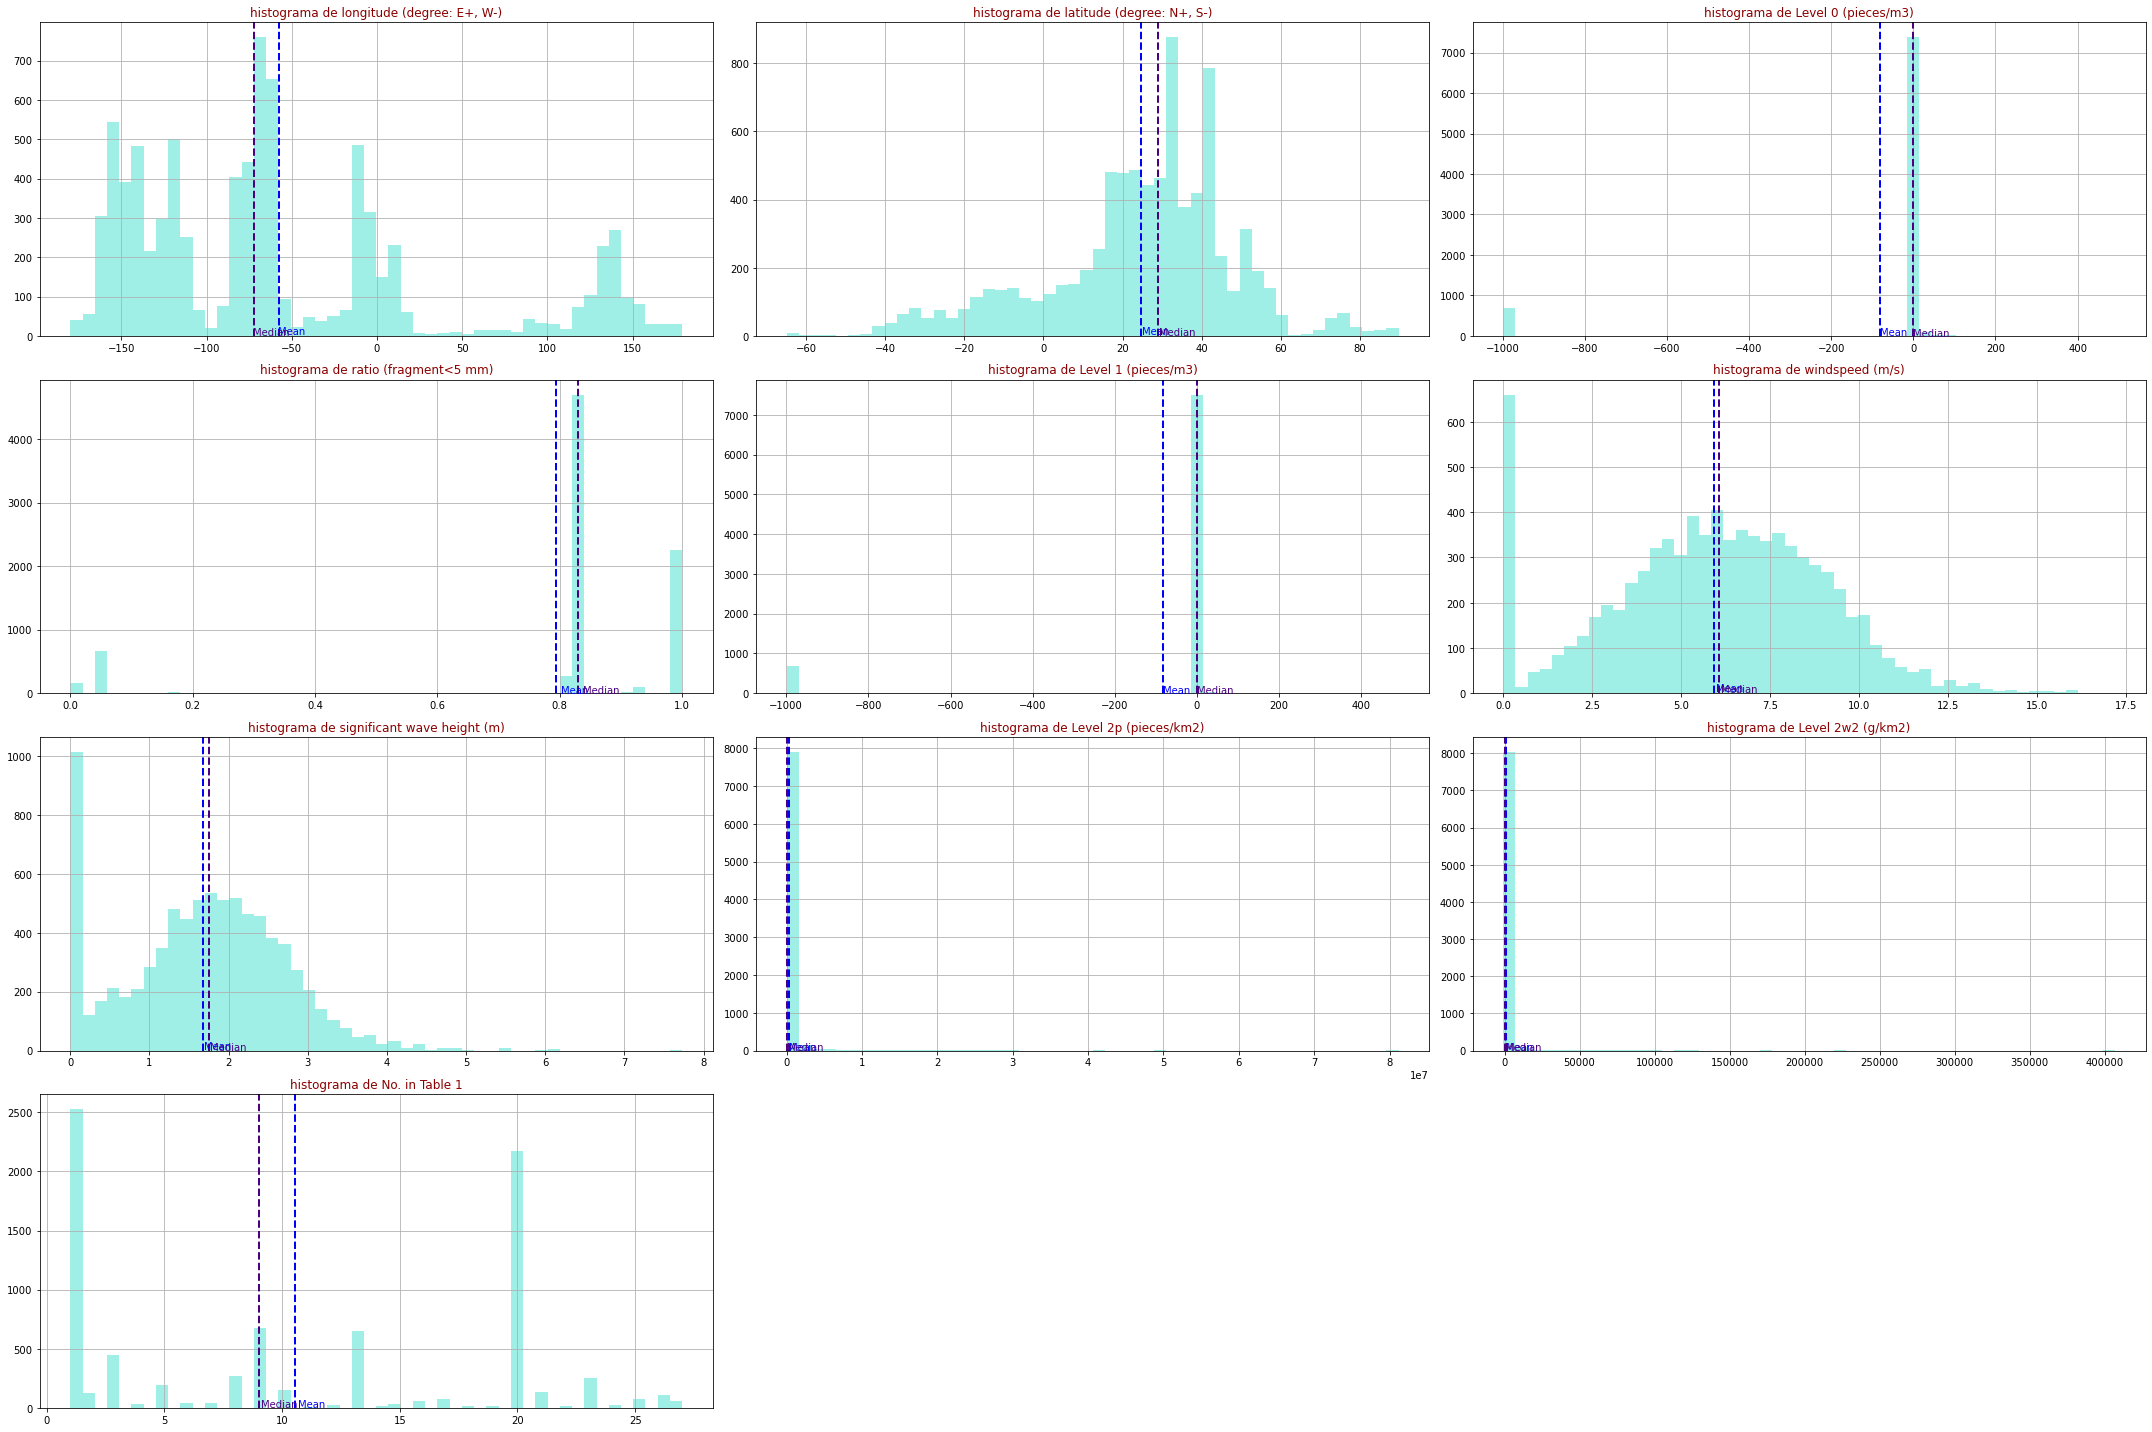

In [56]:
def verticalLine(plot, x, y, color, nome):
    plot.axvline(x, color=color, linestyle="dashed", linewidth=2)
    plot.text(1.01*x, y, nome, color=color)    


def draw_histograms(dataframe, features, rows, cols):
    fig=plt.figure(figsize=(30,20))
    for i, feature in enumerate(features):
        ax=fig.add_subplot(rows,cols,i+1)
        plot1=dataframe[feature].hist(bins=50,ax=ax,color='turquoise', alpha=0.5)
        verticalLine(plot1, dataframe[feature].mean(), 5, "blue", "Mean")
        verticalLine(plot1, dataframe[feature].median(), 2, "indigo", "Median")
        ax.set_title('histograma de '+feature,color='DarkRed')
        
    fig.tight_layout()  
    plt.show()
draw_histograms(df_microplatic,num_microplatic,4,3)

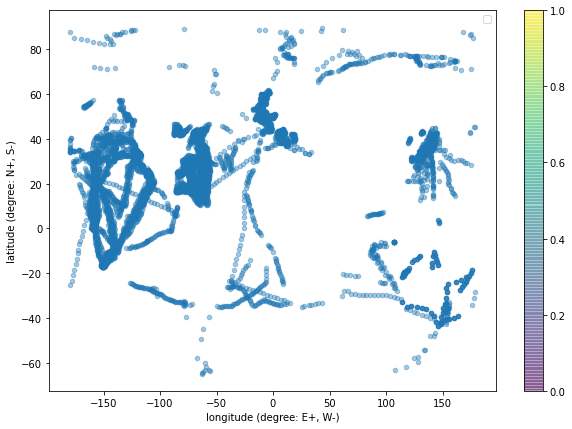

In [62]:
df_microplatic.plot(
    kind='scatter',
    x='longitude (degree: E+, W-)',
    y='latitude (degree: N+, S-)',
#     s="Level 2p",
#     c='Pieces_KM2',
    cmap=plt.get_cmap('jet'),
    colorbar=True,
    figsize=(10, 7),
    alpha=0.4,
    sharex=False,
)
plt.legend()
plt.show()

In [92]:
df = df_microplatic[~df_microplatic['year'].isnull()]
df.shape

(8218, 14)

In [109]:

start_loc= (np.mean(df['latitude (degree: N+, S-)']),np.mean(df['longitude (degree: E+, W-)']))

terrain_map = folium.Map(location=start_loc,
              zoom_start=2,
              tiles='Stamen Terrain')

data_dict= defaultdict(list)

for row in df.itertuples():
    data_dict[int(row.year)].append([row._5, row._4])

heatmap=HeatMapWithTime(data=list(data_dict.values()),
                index=list(data_dict.keys()),
                radius=10,
                min_opacity=0.1,
                max_opacity=0.6,
                auto_play=True,
               control=True,
                show=True).add_to(terrain_map)

terrain_map

In [106]:
int(row.year)

2001